## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from matplotlib.pyplot import pie, axis, show
from scipy.stats import linregress
from scipy.stats import pearsonr
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = 'outer', on='Mouse ID')
# Display the data table for preview
combined_df.head(12)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
#  ------- OBSERVATIONS --------------------------- 

# Table.1 "Total Mice"  - 
    #1. There seems to be a relatively small data set for the total mice 
    #2. It is unknown what type of mice thet are 
    #3. There is an odd number, so there will be an uneven distribution amongst Drug Regimens 
# Table.2 'Summary Statistics Table'
    #1. The mean Tumor volume seems to be relatively similar amongst Drug Regimes 
    #2. Capomulin has the lowest median Tumor Volume. I can infer that this treatment has the highest success with tumor depletion. 
    #3. Ketapril has the largest variance between Tumor volumes 
# Figure.1 'Count of Drug Regimens'
    #1. Capomulin and Ramicane are the two most used Drug Regimens 
    #2. Propiva is the least Used Drug Regimen 
    #3. The other Drug Regimens have roughly the same count 
    
# Figure.2 'Pie Chart based on Sex '
    #1. There are almost an equal number of male and female mice 
    #2. There are slightly more male mice then female mice 
    #3. I chose the colors blue and orange
#Table. 3 ' Merged Summary Statistic Table'
    #1. The Timepoint column has recorded the final Tumor Volume for each mouse 
    #2. The age of the Mouse varies with their last recorded tumor size 
    #3. The Metastatic sites also vary, raning from 0 to 4 metastatic sites 
#Figure 3. 'Tumor by Regimen BoxPlot '
    #1.Infubinol has the only identifiable outlier. It has a Tumor Volume mean as 36.321346
    #2. Ramicane has the lowest median tumor volume of : 36.56165229 
    #3. Creftamin has the largest distance between the upper and lower quartile (15.58 mm3)
#Figure 4. ' Tumor Volume over time for Mouse x401 on Capomulin'
    #1. There is a sharp decrease over in tumor volume over time for the mouse on the Capomulin treatment 
    #2. Tumor volume plateaus slightly at timepoints 0, 10 and 20
    #.3 The final tumor volume appears to be around 30.0 mm3
#Figure 5. 'Correlation between Average tumor volume and mouse weight, Capomulin Regimen'
    #1. There is a strong positive correlation between avg tumor volume and mouse weight 
    #2. Due to the strong correlation, it can be inferred that the greater the mouse weight, the greater the tumor size. 
    #3. The Pearsons Correlation coefficient was calcualted to be 0.842.. which indicates a strong, positive correlation. 
#Figure 6. 'Regression Analysis '
    #1. The regression equation was calculated to be  [ y = 0.74x + -10.15 ] 
    #2. 0.74 indicates a strong positive slope 
    #3. The y-intercept is -10.15 

In [3]:
# Checking the number of mice.
num_mice = len(combined_df["Mouse ID"].unique())
total_mice = pd.DataFrame({"Total Mice": [num_mice]})
total_mice


,Total Mice
0,249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_df = combined_df.sort_values("Timepoint").drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_df['Mouse ID'].count()


1888

In [5]:
# Checking the number of mice in the clean DataFrame.
cleancheck = clean_df.duplicated(subset=['Mouse ID', "Timepoint"])
cleancheck.value_counts()


False    1888
dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#########What other way is there to do it? ################
Clean_tumor_mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Clean_tumor_mean2 = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Clean_tumor_mean3 = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Clean_tumor_mean4 = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
Clean_tumor_mean5 = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


tumor_table = pd.DataFrame({"Mean": Clean_tumor_mean.map("{:,.2f}".format), "Median": Clean_tumor_mean2.map("{:,.2f}".format), "Variance": Clean_tumor_mean3.map("{:,.2f}".format),
              "STD": Clean_tumor_mean4.map("{:,.2f}".format), "SEM": Clean_tumor_mean5.map("{:,.2f}".format)})
tumor_table

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.78,43.15,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# ******* HOW CAN I FORMAT THIS TO 3 DECIMAL PLACES 
regimen_group3 = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean', 'median',"var" ,"std", "sem"]})

regimen_group3

#regimen_group3.rename(columns = {"mean": "Mean", "median": "Median", "std": "STD", "var": "Variance", "week": "SEM"})
#regimen_group3["mean"] = regimen_group3["mean"].map("${:,.2f}".format) 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.390791  50.783528  43.154153  6.569182  0.525955
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

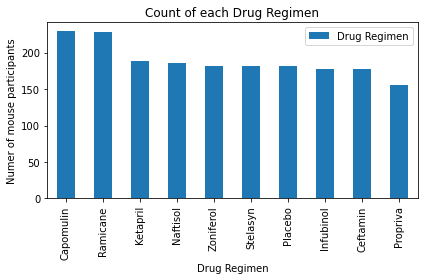

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_regimens = clean_df["Drug Regimen"]

drugs1 = pd.DataFrame(drug_regimens.value_counts())

ax = drugs1.plot.bar()
plt.title("Count of each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Numer of mouse participants")
plt.tight_layout()
plt.show()

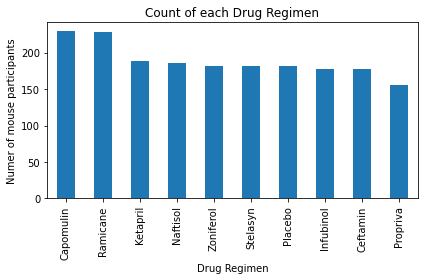

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#USE PYPLOT 

clean_df["Drug Regimen"].value_counts().plot(kind='bar')
plt.title("Count of each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Numer of mouse participants")

plt.tight_layout()
plt.show()

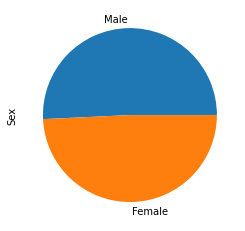

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df["Sex"].value_counts().plot(kind="pie") 

<ipython-input-11-a10e28f16219>:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender1, labels = labels)


([<matplotlib.patches.Wedge at 0x7f857186a670>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')])

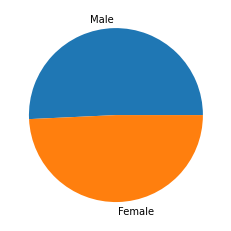

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

colors = ["lightcoral", "lightskyblue"]

genders = clean_df["Sex"].value_counts()
gender1 = pd.DataFrame(genders)

plt.pie(gender1, labels = labels)

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

grouped1 = clean_df[["Tumor Volume (mm3)", "Drug Regimen", "Timepoint", "Mouse ID"]]


subset = grouped1.loc[(grouped1["Drug Regimen"] == "Capomulin") | (grouped1["Drug Regimen"]== "Ramicane") |(grouped1["Drug Regimen"]== "Infubinol") |(grouped1["Drug Regimen"]== "Ceftamin"),:]
subset1 = pd.DataFrame(subset)


# Start by getting the last (greatest) timepoint for each mouse
 # ************ I DID THIS, BUT THEN HAD TO FIND THE MINIMUM TUMOR VOLUME ASSOCIATED *********************
subset2 = clean_df.groupby(['Mouse ID', 'Weight (g)', 'Drug Regimen']).agg({'Timepoint': ['max'], 'Tumor Volume (mm3)': ['min']  }).reset_index()
subset2

newgroup = clean_df.groupby(['Mouse ID']).max()["Timepoint"]

#print(newgroup.head())
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_combined = pd.merge(newgroup,clean_df, how = 'left', on = ["Mouse ID", "Timepoint"])
new_combined.head(20)
                

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [13]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = []

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for treatment in treatments: 
    treatment_df = new_combined.loc[new_combined["Drug Regimen"]== treatment,"Tumor Volume (mm3)"]
    treatment_list.append(treatment_df)
    
    quartiles = treatment_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 
 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)  

    print(treatment)
    print(f"The lower quartile of the treatment is: {str(round(lowerq, 2))}")
    print(f"The upper quartile of the treatment is: {str(round(upperq, 2))}")
    print(f"The interquartile range of the treatment is: {str(round(iqr, 2))}")
    print(f"The the median of the treatment is: {str(round(quartiles[0.5], 2))} ")

    print(f"Values below {str(round(lower_bound,2))} could be outliers.")
    print(f"Values above {str(round(upper_bound, 2))} could be outliers.")
    
    outliers = treatment_df.loc[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
    print(f'The outliers are: {outliers}')
    print(f' - - - - - - - - - - - - - - - - - - - - - - - -')
    

Capomulin
The lower quartile of the treatment is: 32.38
The upper quartile of the treatment is: 40.16
The interquartile range of the treatment is: 7.78
The the median of the treatment is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
The outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 - - - - - - - - - - - - - - - - - - - - - - - -
Ramicane
The lower quartile of the treatment is: 31.56
The upper quartile of the treatment is: 40.66
The interquartile range of the treatment is: 9.1
The the median of the treatment is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
The outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 - - - - - - - - - - - - - - - - - - - - - - - -
Infubinol
The lower quartile of the treatment is: 54.05
The upper quartile of the treatment is: 65.53
The interquartile range of the treatment is: 11.48
The the median of the treatment is: 60.17 
Values below 36.83 could 

Text(0.5, 1.0, 'Tumor Volume by Regimen')

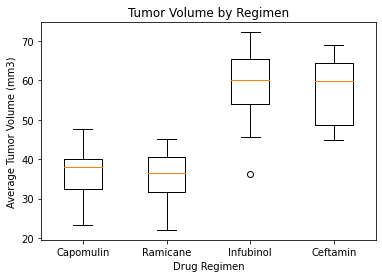

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(treatment_list, labels=treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Tumor Volume by Regimen")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

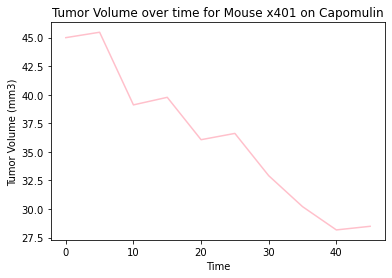

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capo_df1 = capo_df.loc[capo_df["Mouse ID"] == "x401", :]
capo_df1

tumorvol = capo_df1["Tumor Volume (mm3)"]
time = capo_df1["Timepoint"]
plt.plot(time, tumorvol, color = "pink")
plt.title ("Tumor Volume over time for Mouse x401 on Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")

(30.0, 50.0)

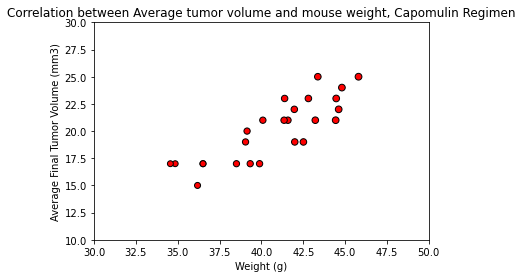

In [22]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
subset22 = subset2.loc[subset2["Drug Regimen"] == "Capomulin", :]

avg_tumor = capo_df.groupby(["Mouse ID", "Sex"]).agg({"Tumor Volume (mm3)": 'mean'})

avg_tumor1 = avg_tumor["Tumor Volume (mm3)"]
                      
weight1 = subset22[["Mouse ID", "Weight (g)"]].drop_duplicates()

weight2 = weight1["Weight (g)"]

plt.scatter(avg_tumor1,weight2, facecolors = "red", edgecolors = "black", s = avg_tumor1)
plt.xlabel("Weight (g)")
plt.ylabel("Average Final Tumor Volume (mm3)")
plt.title("Correlation between Average tumor volume and mouse weight, Capomulin Regimen")
plt.ylim(10,30,2)
plt.xlim(30,50,2)


## Correlation and Regression

In [23]:
correlation, _ = pearsonr(avg_tumor1, weight2)
print(f'Pearsons correlation coefficient is %.3f' %correlation)


Pearsons correlation coefficient is 0.842


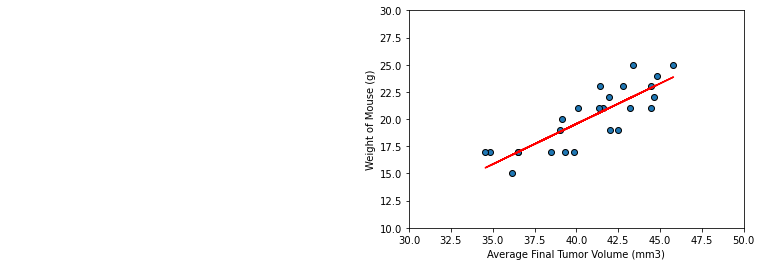

The regression equation is y = 0.74x + -10.15


In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimeny


y_values = weight1["Weight (g)"]
x_values = avg_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 


plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.ylabel("Weight of Mouse (g)")
plt.xlabel("Average Final Tumor Volume (mm3)")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")
plt.ylim(10,30,2)
plt.xlim(30,50,2)

plt.show()

print(f'The regression equation is {line_eq}')
